# Data Description
The dataset contains a shop data.


1.   age
2.   income
3.   gender
4.   m_status
5.   buys



# Importing required packages

In [33]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the dataset and viewing the first 5 rows

In [34]:
df = pd.read_csv('/content/sample_data/shop data.csv')

In [35]:
df.head(5)

,age,income,gender,m_status,buys
0,<25,high,male,single,no
1,<25,high,male,married,no
2,25-35,high,male,single,yes
3,>35,medium,male,single,yes
4,>35,low,female,single,yes


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       22 non-null     object
 1   income    22 non-null     object
 2   gender    22 non-null     object
 3   m_status  22 non-null     object
 4   buys      22 non-null     object
dtypes: object(5)
memory usage: 1008.0+ bytes


In [37]:
df.shape

(22, 5)

In [38]:
ages= df.age.values.tolist()

**we have to preprocess age columns data, as it contains non-digit values as well**

In [39]:

import re
ages = list()
lines = df.age.values.tolist()
for digit in lines:
  patterns= re.compile('\D+')
  digit = patterns.sub('', digit)
  
  ages.append(digit)


In [40]:
df['ages'] = ages

In [41]:
df['ages'] = df['ages'].apply(lambda x: x.replace('2535', '30'))

# Converting required categorical features to numerical form (except target class)

In [42]:
enc_dict = {'low':0,
            'medium':1,
            'high':2}
            
df['income_num'] = df['income'].map(enc_dict)

In [43]:
df.drop(['income', 'age'], 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [44]:
from sklearn import preprocessing

col_cat = ['m_status', 'gender']

lab_en= preprocessing.LabelEncoder()

for c in col_cat:
    df[c]= lab_en.fit_transform(df[c])

# Removing null values if required

In [45]:
df.isnull().sum()

gender        0
m_status      0
buys          0
ages          0
income_num    0
dtype: int64

**There is no null value**

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   gender      22 non-null     int64 
 1   m_status    22 non-null     int64 
 2   buys        22 non-null     object
 3   ages        22 non-null     object
 4   income_num  22 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1008.0+ bytes


In [47]:
df['ages'] = df.ages.astype(int)

# Train-test spliting

In [48]:
X = df.drop('buys', axis=1)
Y = df.buys.values

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100, shuffle=True)

# Building the Decision Tree model

In [50]:
decisionTree_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100)

In [51]:
decisionTree_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

# Predicting on test data

In [52]:
y_preds = decisionTree_entropy.predict(X_test)
y_preds

array(['no', 'yes', 'no', 'yes', 'no'], dtype=object)

# Finding out confusion matrix and accuracy

In [53]:
print ("Accuracy : ", accuracy_score(y_test, y_preds)*100)

Accuracy :  60.0


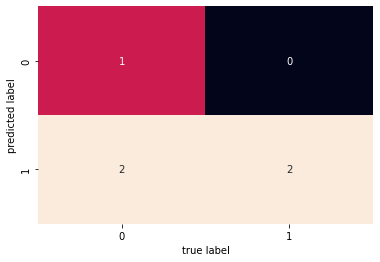

In [54]:
sns.heatmap(
    confusion_matrix(y_test, y_preds),
    annot=True,
    cbar=False)
plt.xlabel("true label")
plt.ylabel("predicted label");